# Eksperyment z wyjściem z domu na 9 godzin, zimno

Symulujemy ciągłe ogrzewanie mieszkania przez 24 godziny, po czym symulujemy wyłączenie ogrzewania na 9 godzin bycia poza domem i ponowne ogrzanie po powrocie do domu. Wszystko dla temperatury na zewnątrz równej 5 stopni celsjusza. Później porównamy zużycie energii.

In [1]:
import sys
import os
import matplotlib.pyplot as plt

# Dodanie folderu nadrzędnego do ścieżki systemowej
sys.path.append(os.path.abspath('..'))

from pipeline.flat import Flat

In [2]:
#@Tworzenie mieszkania

moje_mieszkanie = Flat(6, 10, 22, 22,
                       19, 22, 5, 22,
                       300, 0.1)

moje_mieszkanie.add_outer_object("south", 2.6, 4.8, "window")

moje_mieszkanie.add_outer_object("north", 4.6, 5.6, "door")

moje_mieszkanie.add_radiator("horizontal", 0.1,
                             1, 2.6, 9.8, 6885)
moje_mieszkanie.add_radiator("vertical", 0.1,
                             3, 3.8, 3.8, 500)

moje_mieszkanie.add_inner_object("horizontal", 4, 0.3,
                                 0.2, 4, "wall")
moje_mieszkanie.add_inner_object("vertical", 4, 0.2,
                                 0.2, 4, "wall")
moje_mieszkanie.add_inner_object("vertical", 4, 0.3,
                                 1, 2, "door")


In [3]:
#@Symulacja ogrzewania
def experiment_sym(n):
    total_energy_used_1 = 0
    average_temp_lst_1 = [moje_mieszkanie.average_temp - 273.15]
    total_energy_used_2 = 0
    average_temp_lst_2 = [moje_mieszkanie.average_temp - 273.15]
    
    moje_mieszkanie.change_radiators_heat_level(n)
    for _ in range(24):
        simulation = moje_mieszkanie.heat_up(1)
        total_energy_used_1 += simulation[0]
        average_temp_lst_1.append(simulation[1])
    
    moje_mieszkanie.change_radiators_heat_level(0)
    
    # Wychodzimy z domu na 9 godzin
    for _ in range(9):
        simulation = moje_mieszkanie.heat_up(1)
        average_temp_lst_2.append(simulation[1])
    
    # Wracamy i włączamy ogrzewanie
    moje_mieszkanie.change_radiators_heat_level(n)
    
    for _ in range(15):
        simulation = moje_mieszkanie.heat_up(1)
        total_energy_used_2 += simulation[0]
        average_temp_lst_2.append(simulation[1])

    return total_energy_used_1, average_temp_lst_1, total_energy_used_2, average_temp_lst_2


In [4]:
experiment_sym(5)
total_energy_used_1, average_temp_lst_1, total_energy_used_2, average_temp_lst_2 = experiment_sym(5)

Całkowita zużyta energia przy ciągle włączonym ogrzewaniu: 77.50 kwh
Całkowita zużyta energia przy wyłączonym ogrzewaniu przy wyjściu z domu: 62.27 kwh


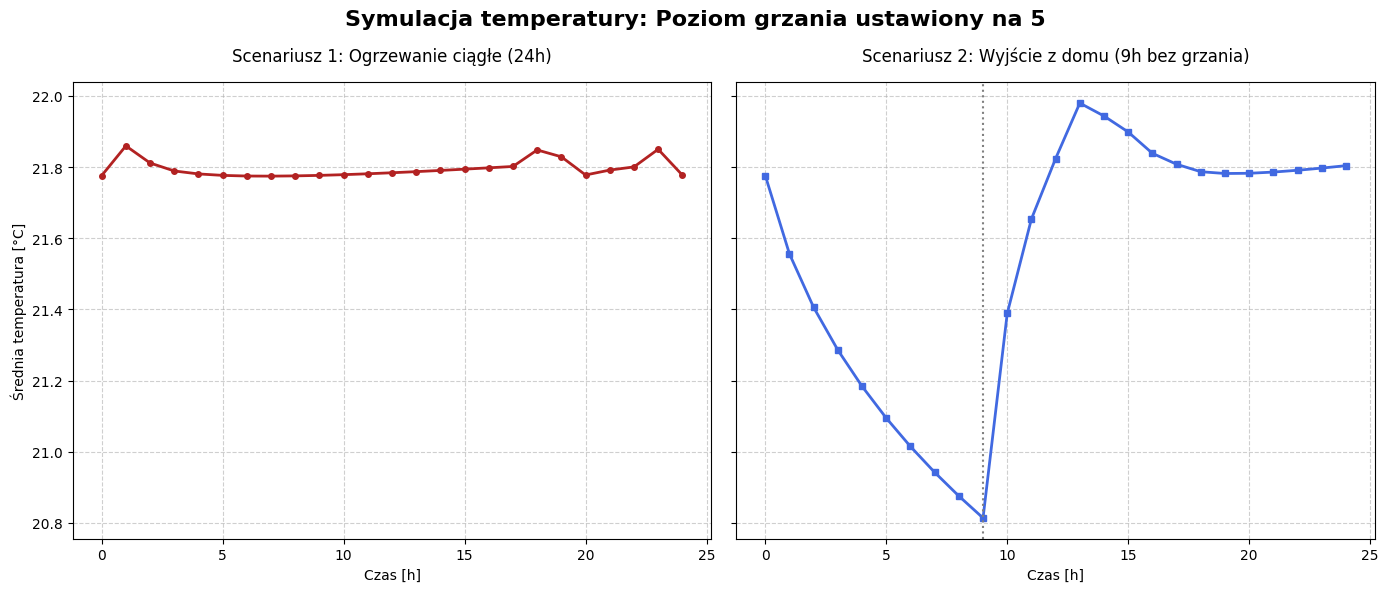

In [5]:
#@Eksperyment z poziomem grzania ustawionym na 5

print(f"Całkowita zużyta energia przy ciągle włączonym ogrzewaniu: {total_energy_used_1:.2f} kwh")
print(f"Całkowita zużyta energia przy wyłączonym ogrzewaniu przy wyjściu z domu: {total_energy_used_2:.2f} kwh")

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True) # sharey sprawia, że oba wykresy mają tę samą skalę Y

fig.suptitle('Symulacja temperatury: Poziom grzania ustawiony na 5', fontsize=16, fontweight='bold', y=0.98)
# Wykres 1: Ogrzewanie ciągłe
axs[0].plot(range(25), average_temp_lst_1, marker='o', linestyle='-', color='firebrick', linewidth=2, markersize=4)
axs[0].set_title('Scenariusz 1: Ogrzewanie ciągłe (24h)', fontsize=12, pad=15)
axs[0].set_xlabel('Czas [h]')
axs[0].set_ylabel('Średnia temperatura [°C]')
axs[0].grid(True, linestyle='--', alpha=0.6)

# Wykres 2: Ogrzewanie z przerwą (wyjście z domu)
axs[1].plot(range(25), average_temp_lst_2, marker='s', linestyle='-', color='royalblue', linewidth=2, markersize=4)
# Dodajemy linię pionową w miejscu, gdzie wracamy do domu (po 9h)
axs[1].axvline(x=9, color='gray', linestyle=':', label='Powrót do domu')

axs[1].set_title('Scenariusz 2: Wyjście z domu (9h bez grzania)', fontsize=12, pad=15)
axs[1].set_xlabel('Czas [h]')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [6]:
total_energy_used_3, average_temp_lst_3, total_energy_used_4, average_temp_lst_4 = experiment_sym(4)

Całkowita zużyta energia przy ciągle włączonym ogrzewaniu: 72.94 kwh
Całkowita zużyta energia przy wyłączonym ogrzewaniu przy wyjściu z domu: 58.62 kwh


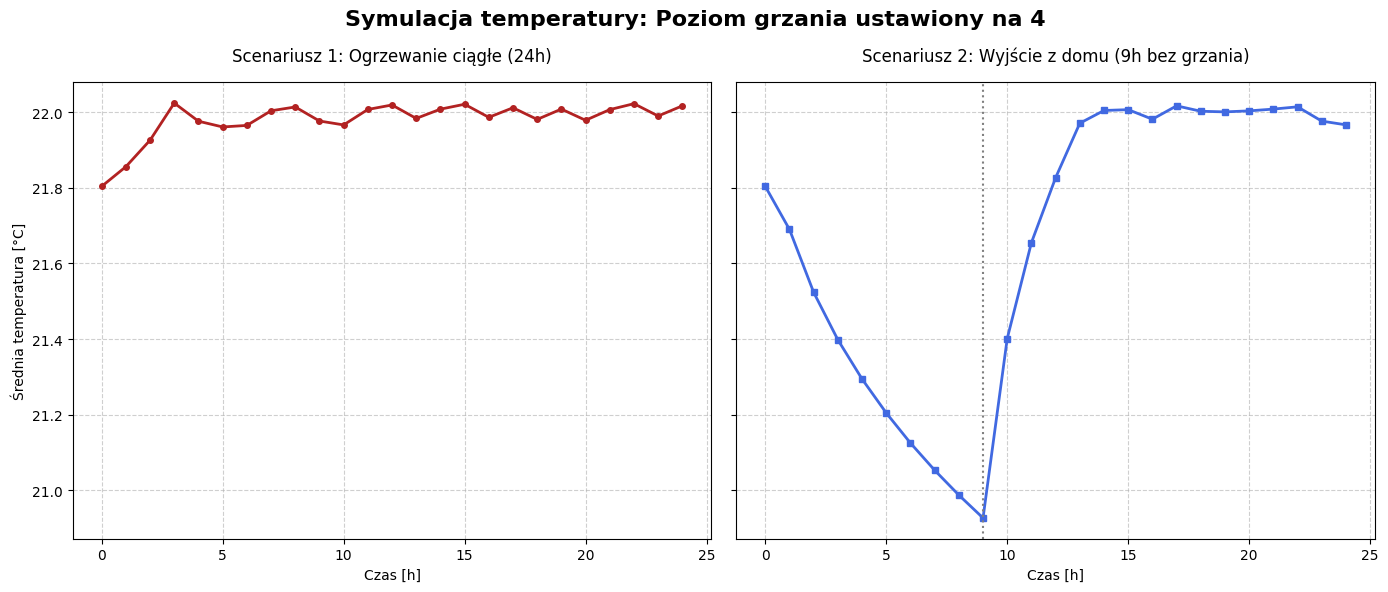

In [7]:
#@Eksperyment z poziomem grzania ustawionym na 4

print(f"Całkowita zużyta energia przy ciągle włączonym ogrzewaniu: {total_energy_used_3:.2f} kwh")
print(f"Całkowita zużyta energia przy wyłączonym ogrzewaniu przy wyjściu z domu: {total_energy_used_4:.2f} kwh")

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True) # sharey sprawia, że oba wykresy mają tę samą skalę Y

fig.suptitle('Symulacja temperatury: Poziom grzania ustawiony na 4', fontsize=16, fontweight='bold', y=0.98)
# Wykres 1: Ogrzewanie ciągłe
axs[0].plot(range(25), average_temp_lst_3, marker='o', linestyle='-', color='firebrick', linewidth=2, markersize=4)
axs[0].set_title('Scenariusz 1: Ogrzewanie ciągłe (24h)', fontsize=12, pad=15)
axs[0].set_xlabel('Czas [h]')
axs[0].set_ylabel('Średnia temperatura [°C]')
axs[0].grid(True, linestyle='--', alpha=0.6)

# Wykres 2: Ogrzewanie z przerwą (wyjście z domu)
axs[1].plot(range(25), average_temp_lst_4, marker='s', linestyle='-', color='royalblue', linewidth=2, markersize=4)
# Dodajemy linię pionową w miejscu, gdzie wracamy do domu (po 9h)
axs[1].axvline(x=9, color='gray', linestyle=':', label='Powrót do domu')

axs[1].set_title('Scenariusz 2: Wyjście z domu (9h bez grzania)', fontsize=12, pad=15)
axs[1].set_xlabel('Czas [h]')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [8]:
total_energy_used_5, average_temp_lst_5, total_energy_used_6, average_temp_lst_6 = experiment_sym(3)

Całkowita zużyta energia przy ciągle włączonym ogrzewaniu: 66.43 kwh
Całkowita zużyta energia przy wyłączonym ogrzewaniu przy wyjściu z domu: 54.71 kwh


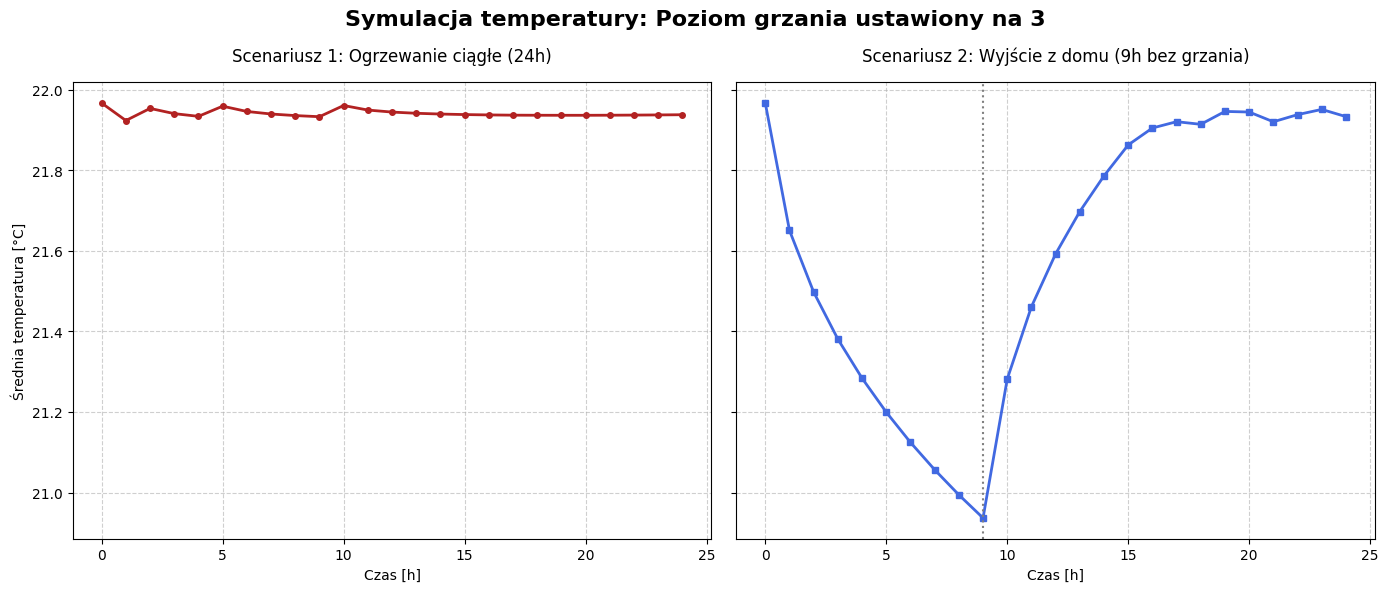

In [9]:
#@Eksperyment z poziomem grzania ustawionym na 3

print(f"Całkowita zużyta energia przy ciągle włączonym ogrzewaniu: {total_energy_used_5:.2f} kwh")
print(f"Całkowita zużyta energia przy wyłączonym ogrzewaniu przy wyjściu z domu: {total_energy_used_6:.2f} kwh")

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True) # sharey sprawia, że oba wykresy mają tę samą skalę Y

fig.suptitle('Symulacja temperatury: Poziom grzania ustawiony na 3', fontsize=16, fontweight='bold', y=0.98)
# Wykres 1: Ogrzewanie ciągłe
axs[0].plot(range(25), average_temp_lst_5, marker='o', linestyle='-', color='firebrick', linewidth=2, markersize=4)
axs[0].set_title('Scenariusz 1: Ogrzewanie ciągłe (24h)', fontsize=12, pad=15)
axs[0].set_xlabel('Czas [h]')
axs[0].set_ylabel('Średnia temperatura [°C]')
axs[0].grid(True, linestyle='--', alpha=0.6)

# Wykres 2: Ogrzewanie z przerwą (wyjście z domu)
axs[1].plot(range(25), average_temp_lst_6, marker='s', linestyle='-', color='royalblue', linewidth=2, markersize=4)
# Dodajemy linię pionową w miejscu, gdzie wracamy do domu (po 9h)
axs[1].axvline(x=9, color='gray', linestyle=':', label='Powrót do domu')

axs[1].set_title('Scenariusz 2: Wyjście z domu (9h bez grzania)', fontsize=12, pad=15)
axs[1].set_xlabel('Czas [h]')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [10]:
total_energy_used_7, average_temp_lst_7, total_energy_used_8, average_temp_lst_8 = experiment_sym(2)

Całkowita zużyta energia przy ciągle włączonym ogrzewaniu: 63.04 kwh
Całkowita zużyta energia przy wyłączonym ogrzewaniu przy wyjściu z domu: 42.98 kwh


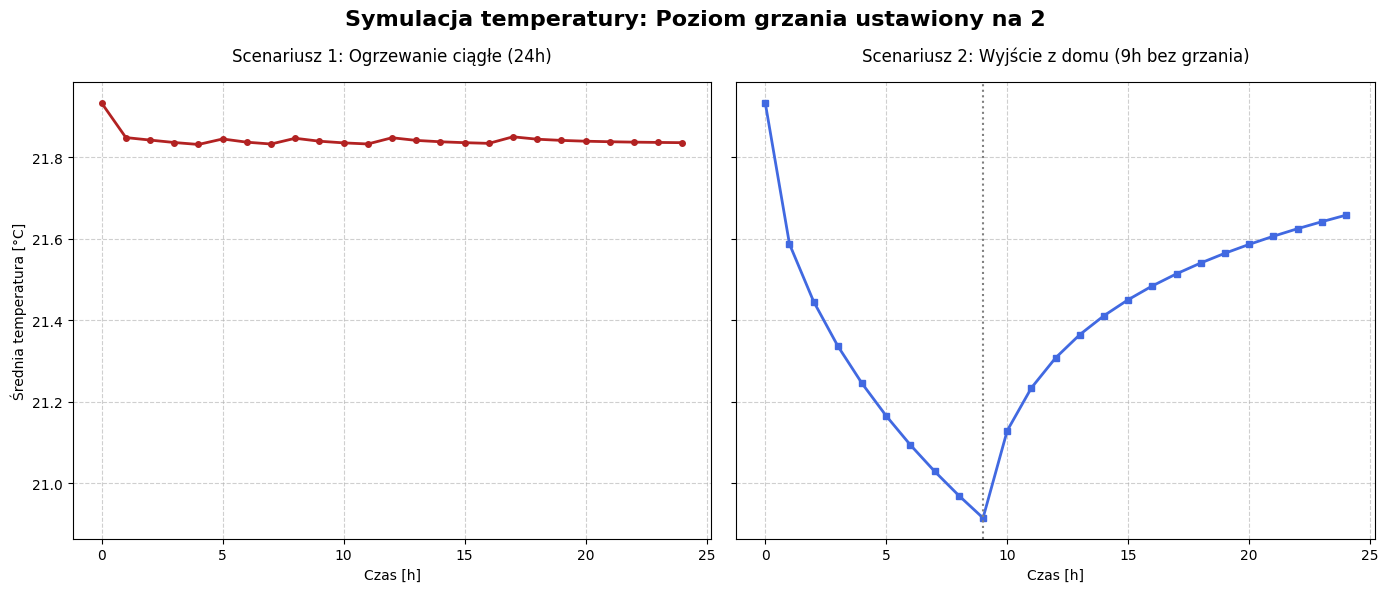

In [11]:
#@Eksperyment z poziomem grzania ustawionym na 2

print(f"Całkowita zużyta energia przy ciągle włączonym ogrzewaniu: {total_energy_used_7:.2f} kwh")
print(f"Całkowita zużyta energia przy wyłączonym ogrzewaniu przy wyjściu z domu: {total_energy_used_8:.2f} kwh")

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True) # sharey sprawia, że oba wykresy mają tę samą skalę Y

fig.suptitle('Symulacja temperatury: Poziom grzania ustawiony na 2', fontsize=16, fontweight='bold', y=0.98)
# Wykres 1: Ogrzewanie ciągłe
axs[0].plot(range(25), average_temp_lst_7, marker='o', linestyle='-', color='firebrick', linewidth=2, markersize=4)
axs[0].set_title('Scenariusz 1: Ogrzewanie ciągłe (24h)', fontsize=12, pad=15)
axs[0].set_xlabel('Czas [h]')
axs[0].set_ylabel('Średnia temperatura [°C]')
axs[0].grid(True, linestyle='--', alpha=0.6)

# Wykres 2: Ogrzewanie z przerwą (wyjście z domu)
axs[1].plot(range(25), average_temp_lst_8, marker='s', linestyle='-', color='royalblue', linewidth=2, markersize=4)
# Dodajemy linię pionową w miejscu, gdzie wracamy do domu (po 9h)
axs[1].axvline(x=9, color='gray', linestyle=':', label='Powrót do domu')

axs[1].set_title('Scenariusz 2: Wyjście z domu (9h bez grzania)', fontsize=12, pad=15)
axs[1].set_xlabel('Czas [h]')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [12]:
total_energy_used_9, average_temp_lst_9, total_energy_used_10, average_temp_lst_10 = experiment_sym(1)

Całkowita zużyta energia przy ciągle włączonym ogrzewaniu: 34.39 kwh
Całkowita zużyta energia przy wyłączonym ogrzewaniu przy wyjściu z domu: 21.49 kwh


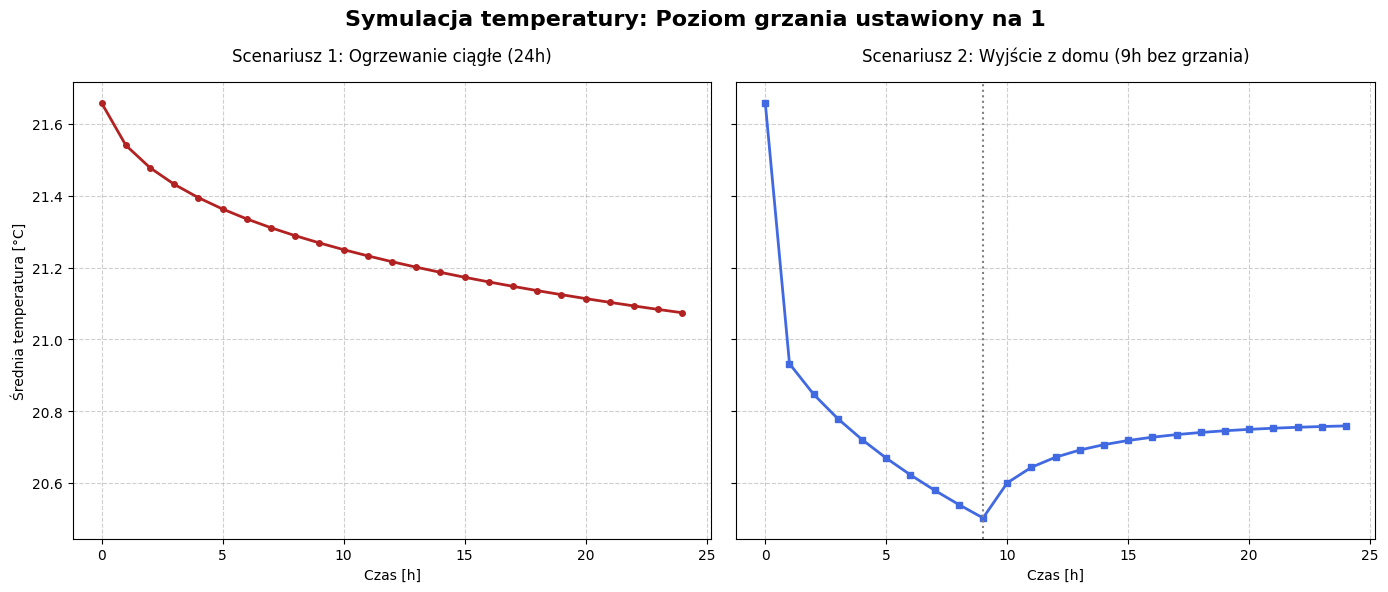

In [13]:
#@Eksperyment z poziomem grzania ustawionym na 1

print(f"Całkowita zużyta energia przy ciągle włączonym ogrzewaniu: {total_energy_used_9:.2f} kwh")
print(f"Całkowita zużyta energia przy wyłączonym ogrzewaniu przy wyjściu z domu: {total_energy_used_10:.2f} kwh")

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True) # sharey sprawia, że oba wykresy mają tę samą skalę Y

fig.suptitle('Symulacja temperatury: Poziom grzania ustawiony na 1', fontsize=16, fontweight='bold', y=0.98)
# Wykres 1: Ogrzewanie ciągłe
axs[0].plot(range(25), average_temp_lst_9, marker='o', linestyle='-', color='firebrick', linewidth=2, markersize=4)
axs[0].set_title('Scenariusz 1: Ogrzewanie ciągłe (24h)', fontsize=12, pad=15)
axs[0].set_xlabel('Czas [h]')
axs[0].set_ylabel('Średnia temperatura [°C]')
axs[0].grid(True, linestyle='--', alpha=0.6)

# Wykres 2: Ogrzewanie z przerwą (wyjście z domu)
axs[1].plot(range(25), average_temp_lst_10, marker='s', linestyle='-', color='royalblue', linewidth=2, markersize=4)
# Dodajemy linię pionową w miejscu, gdzie wracamy do domu (po 9h)
axs[1].axvline(x=9, color='gray', linestyle=':', label='Powrót do domu')

axs[1].set_title('Scenariusz 2: Wyjście z domu (9h bez grzania)', fontsize=12, pad=15)
axs[1].set_xlabel('Czas [h]')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Niezależnie od ustawienia grzejników bardziej opłaca się wyłączyć ogrzewanie na wyjście z domu. Nawet jeśli stale będziemy ogrzewać w najbardziej oszczędny sposób (z ustawieniem grzejników na 2, bo wtedy utrzymują docelową temperaturę), a dogrzewać jak najszybciej (z ustawieniem grzejników na 5) to ponowne ogrzanie jest bardziej opłacalne.